# Preparing Period

## Import Library

In [1]:
!pip install ace_tools

In [6]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from scipy.stats import norm

## Data Uploading

In [3]:
# Download latest version
path = kagglehub.dataset_download("jsphyg/weather-dataset-rattle-package")

print("Path to dataset files:", path)

100%|██████████| 3.83M/3.83M [00:00<00:00, 42.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jsphyg/weather-dataset-rattle-package/versions/2


In [4]:
# Listing files in dataset
!ls {path}

weatherAUS.csv


In [5]:
# Display dataset
file_path = f"{path}/weatherAUS.csv"
data = pd.read_csv(file_path)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Data Analysis

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [11]:
nan_counts = data.isna().sum(axis=1)

# Fill columns with no NaN value
no_nan_samples = data[nan_counts <= 0]

# Display the result
print(f"Sample with no NaN value: {len(no_nan_samples)}")
display(no_nan_samples)

Sample with no NaN value: 56420


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [12]:
# Count numbers of each value of every characteristic
for i, column in enumerate(data.columns, start=1):
    print(f"\nCharacteristic: {column}")
    value_counts = data[column].value_counts(dropna=False)  # Include NaN
    mean = np.mean(value_counts)
    median = np.median(value_counts)
    variance = np.var(value_counts)
    print(f"Mean: {mean}, Median: {median}, Variance: {variance}")
    percentage = (value_counts / len(data) * 100).round(2)


    table = pd.DataFrame({
        'Value': value_counts.index,
        'Occurence Number': value_counts.values,
        'Frequency (%)': percentage.values
    })

    print(f"Table {i}: {column}")
    display(table)


Characteristic: Date
Mean: 42.33410942956927, Median: 46.0, Variance: 199.0618283978037
Table 1: Date


,Value,Occurence Number,Frequency (%)
0,2013-11-12,49,0.03
1,2014-09-01,49,0.03
2,2014-08-23,49,0.03
3,2014-08-24,49,0.03
4,2014-08-25,49,0.03
...,...,...,...
3431,2007-11-29,1,0.00
3432,2007-11-28,1,0.00
3433,2007-11-27,1,0.00
3434,2007-11-26,1,0.00



Characteristic: Location
Mean: 2968.5714285714284, Median: 3009.0, Variance: 134188.0408163265
Table 2: Location


,Value,Occurence Number,Frequency (%)
0,Canberra,3436,2.36
1,Sydney,3344,2.30
2,Darwin,3193,2.20
3,Melbourne,3193,2.20
4,Brisbane,3193,2.20
5,Adelaide,3193,2.20
6,Perth,3193,2.20
7,Hobart,3193,2.20
8,Albany,3040,2.09
9,MountGambier,3040,2.09



Characteristic: MinTemp
Mean: 372.97435897435895, Median: 313.0, Variance: 94646.2198553582
Table 3: MinTemp


,Value,Occurence Number,Frequency (%)
0,NaN,1485,1.02
1,11.0,899,0.62
2,10.2,898,0.62
3,9.6,896,0.62
4,10.5,884,0.61
...,...,...,...
385,30.5,1,0.00
386,-7.3,1,0.00
387,-7.8,1,0.00
388,-7.2,1,0.00



Characteristic: MaxTemp
Mean: 287.4703557312253, Median: 152.0, Variance: 83524.1463544188
Table 4: MaxTemp


,Value,Occurence Number,Frequency (%)
0,NaN,1261,0.87
1,20.0,885,0.61
2,19.0,843,0.58
3,19.8,840,0.58
4,20.4,834,0.57
...,...,...,...
501,46.5,1,0.00
502,46.9,1,0.00
503,47.0,1,0.00
504,46.6,1,0.00



Characteristic: Rainfall
Mean: 213.28445747800586, Median: 3.0, Variance: 12312650.367764262
Table 5: Rainfall


,Value,Occurence Number,Frequency (%)
0,0.0,91080,62.62
1,0.2,8761,6.02
2,0.4,3782,2.60
3,NaN,3261,2.24
4,0.6,2592,1.78
...,...,...,...
677,134.8,1,0.00
678,84.4,1,0.00
679,157.6,1,0.00
680,166.8,1,0.00



Characteristic: Evaporation
Mean: 405.18105849582173, Median: 6.0, Variance: 11169852.649669092
Table 6: Evaporation


,Value,Occurence Number,Frequency (%)
0,NaN,62790,43.17
1,4.0,3339,2.30
2,8.0,2609,1.79
3,2.2,2095,1.44
4,2.0,2032,1.40
...,...,...,...
354,22.1,1,0.00
355,44.4,1,0.00
356,60.2,1,0.00
357,44.0,1,0.00



Characteristic: Sunshine
Mean: 996.3013698630137, Median: 479.5, Variance: 32763770.333833773
Table 7: Sunshine


,Value,Occurence Number,Frequency (%)
0,NaN,69835,48.01
1,0.0,2359,1.62
2,10.7,1101,0.76
3,11.0,1094,0.75
4,10.8,1069,0.73
...,...,...,...
141,14.0,15,0.01
142,14.1,6,0.00
143,14.3,4,0.00
144,14.2,2,0.00



Characteristic: WindGustDir
Mean: 8556.470588235294, Median: 8967.0, Variance: 1156067.6608996538
Table 8: WindGustDir


,Value,Occurence Number,Frequency (%)
0,NaN,10326,7.10
1,W,9915,6.82
2,SE,9418,6.47
3,N,9313,6.40
4,SSE,9216,6.34
5,E,9181,6.31
6,S,9168,6.30
7,WSW,9069,6.23
8,SW,8967,6.16
9,SSW,8736,6.01



Characteristic: WindGustSpeed
Mean: 2139.1176470588234, Median: 534.5, Variance: 8372476.633217998
Table 9: WindGustSpeed


,Value,Occurence Number,Frequency (%)
0,NaN,10263,7.06
1,35.0,9215,6.34
2,39.0,8794,6.05
3,31.0,8428,5.79
4,37.0,8047,5.53
...,...,...,...
63,122.0,3,0.00
64,126.0,2,0.00
65,124.0,2,0.00
66,130.0,1,0.00



Characteristic: WindDir9am
Mean: 8556.470588235294, Median: 8423.0, Variance: 1344653.4256055367
Table 10: WindDir9am


,Value,Occurence Number,Frequency (%)
0,N,11758,8.08
1,NaN,10566,7.26
2,SE,9287,6.38
3,E,9176,6.31
4,SSE,9112,6.26
5,NW,8749,6.01
6,S,8659,5.95
7,W,8459,5.82
8,SW,8423,5.79
9,NNE,8129,5.59



Characteristic: WindDir3pm
Mean: 8556.470588235294, Median: 8610.0, Variance: 2105839.5432525952
Table 11: WindDir3pm


,Value,Occurence Number,Frequency (%)
0,SE,10838,7.45
1,W,10110,6.95
2,S,9926,6.82
3,WSW,9518,6.54
4,SSE,9399,6.46
5,SW,9354,6.43
6,N,8890,6.11
7,WNW,8874,6.10
8,NW,8610,5.92
9,ESE,8505,5.85



Characteristic: WindSpeed9am
Mean: 3305.909090909091, Median: 522.0, Variance: 18831622.219008263
Table 12: WindSpeed9am


,Value,Occurence Number,Frequency (%)
0,9.0,13649,9.38
1,13.0,13132,9.03
2,11.0,11728,8.06
3,17.0,10788,7.42
4,7.0,10783,7.41
5,15.0,10625,7.30
6,6.0,9118,6.27
7,19.0,8763,6.02
8,0.0,8745,6.01
9,20.0,8063,5.54



Characteristic: WindSpeed3pm
Mean: 3232.4444444444443, Median: 1034.0, Variance: 17685722.11358025
Table 13: WindSpeed3pm


,Value,Occurence Number,Frequency (%)
0,13.0,12580,8.65
1,17.0,12539,8.62
2,20.0,11713,8.05
3,15.0,11483,7.89
4,19.0,11263,7.74
5,11.0,10015,6.89
6,9.0,9753,6.70
7,24.0,9052,6.22
8,22.0,8598,5.91
9,28.0,6553,4.51



Characteristic: Humidity9am
Mean: 1426.078431372549, Median: 1604.0, Variance: 1154647.9546328338
Table 14: Humidity9am


,Value,Occurence Number,Frequency (%)
0,99.0,3391,2.33
1,70.0,3026,2.08
2,69.0,3023,2.08
3,65.0,3014,2.07
4,68.0,3011,2.07
...,...,...,...
97,4.0,20,0.01
98,3.0,10,0.01
99,2.0,8,0.01
100,1.0,5,0.00



Characteristic: Humidity3pm
Mean: 1426.078431372549, Median: 1331.0, Variance: 750453.0526720496
Table 15: Humidity3pm


,Value,Occurence Number,Frequency (%)
0,NaN,4507,3.10
1,52.0,2751,1.89
2,55.0,2738,1.88
3,57.0,2728,1.88
4,53.0,2697,1.85
...,...,...,...
97,4.0,113,0.08
98,3.0,63,0.04
99,2.0,35,0.02
100,1.0,26,0.02



Characteristic: Pressure9am
Mean: 265.9232175502742, Median: 113.0, Variance: 469233.97216661344
Table 16: Pressure9am


,Value,Occurence Number,Frequency (%)
0,NaN,15065,10.36
1,1016.4,816,0.56
2,1017.9,789,0.54
3,1016.3,775,0.53
4,1018.7,775,0.53
...,...,...,...
542,982.3,1,0.00
543,989.0,1,0.00
544,1041.0,1,0.00
545,985.1,1,0.00



Characteristic: Pressure3pm
Mean: 264.4727272727273, Median: 101.0, Variance: 465288.5765289252
Table 17: Pressure3pm


,Value,Occurence Number,Frequency (%)
0,NaN,15028,10.33
1,1015.3,786,0.54
2,1015.5,783,0.54
3,1015.6,776,0.53
4,1015.7,773,0.53
...,...,...,...
545,985.3,1,0.00
546,981.2,1,0.00
547,988.4,1,0.00
548,1037.2,1,0.00



Characteristic: Cloud9am
Mean: 13223.636363636364, Median: 8171.0, Variance: 211829604.95867765
Table 18: Cloud9am


,Value,Occurence Number,Frequency (%)
0,NaN,55888,38.42
1,7.0,19972,13.73
2,1.0,15687,10.78
3,8.0,14697,10.10
4,0.0,8642,5.94
5,6.0,8171,5.62
6,2.0,6500,4.47
7,3.0,5914,4.07
8,5.0,5567,3.83
9,4.0,4420,3.04



Characteristic: Cloud3pm
Mean: 13223.636363636364, Median: 7226.0, Variance: 236085729.322314
Table 19: Cloud3pm


,Value,Occurence Number,Frequency (%)
0,NaN,59358,40.81
1,7.0,18229,12.53
2,1.0,14976,10.30
3,8.0,12660,8.70
4,6.0,8978,6.17
5,2.0,7226,4.97
6,3.0,6921,4.76
7,5.0,6815,4.69
8,4.0,5322,3.66
9,0.0,4974,3.42



Characteristic: Temp9am
Mean: 329.09502262443436, Median: 250.5, Variance: 98825.0000204747
Table 20: Temp9am


,Value,Occurence Number,Frequency (%)
0,NaN,1767,1.21
1,17.0,912,0.63
2,13.8,900,0.62
3,14.8,894,0.61
4,16.0,882,0.61
...,...,...,...
437,-7.2,1,0.00
438,-7.0,1,0.00
439,-3.5,1,0.00
440,-6.2,1,0.00



Characteristic: Temp3pm
Mean: 289.1848906560636, Median: 140.0, Variance: 105775.37535818871
Table 21: Temp3pm


,Value,Occurence Number,Frequency (%)
0,NaN,3609,2.48
1,20.0,882,0.61
2,19.0,869,0.60
3,18.5,869,0.60
4,18.4,868,0.60
...,...,...,...
498,-3.3,1,0.00
499,45.9,1,0.00
500,46.2,1,0.00
501,46.7,1,0.00



Characteristic: RainToday
Mean: 48486.666666666664, Median: 31880.0, Variance: 2048126582.8888886
Table 22: RainToday


,Value,Occurence Number,Frequency (%)
0,No,110319,75.84
1,Yes,31880,21.92
2,NaN,3261,2.24



Characteristic: RainTomorrow
Mean: 48486.666666666664, Median: 31877.0, Variance: 2047855246.8888886
Table 23: RainTomorrow


,Value,Occurence Number,Frequency (%)
0,No,110316,75.84
1,Yes,31877,21.91
2,NaN,3267,2.25


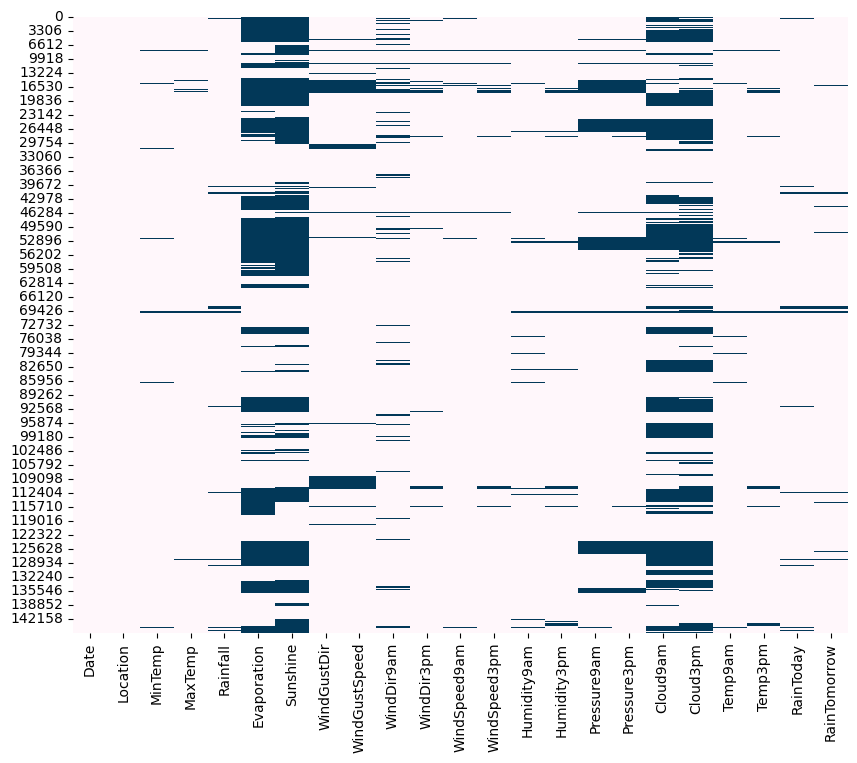

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(), cbar=False, cmap='PuBu')
plt.show()

In [14]:
# create a table with data missing
missing_values = data.isnull().sum() # missing values

percent_missing = data.isnull().sum()/data.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing ,
     'data type' : data.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
Date,0,0.000000,object
Location,0,0.000000,object
MinTemp,1485,1.020899,float64
MaxTemp,1261,0.866905,float64
Rainfall,3261,2.241853,float64
Evaporation,62790,43.166506,float64
Sunshine,69835,48.009762,float64
WindGustDir,10326,7.098859,object
WindGustSpeed,10263,7.055548,float64
WindDir9am,10566,7.263853,object


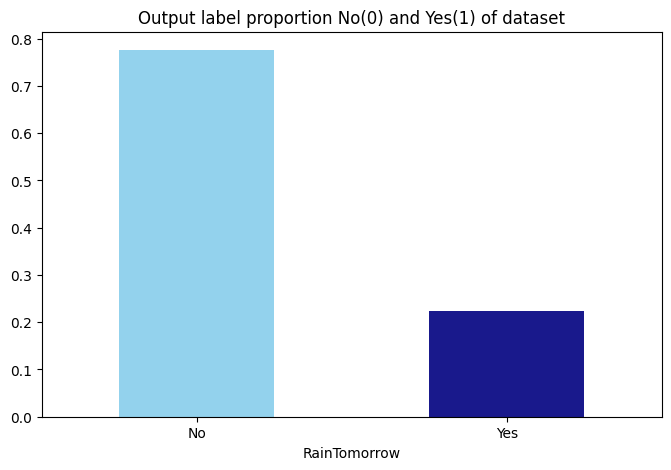

In [15]:
# Kiểm tra tỉ lệ nhãn đầu ra của tập dữ liệu
fig = plt.figure(figsize = (8,5))
data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Output label proportion No(0) and Yes(1) of dataset')
plt.show()

## Pre-processing

### Encoding

In [16]:
# Kiểm tra số nhãn của 2 cột RainToday và RainTomorrow
for col in ['RainToday', 'RainTomorrow']:
    unique_values = data[col].unique()
    print(f"Column '{col}' has {len(unique_values)} unique values: {unique_values}\n")

Column 'RainToday' has 3 unique values: ['No' 'Yes' nan]

Column 'RainTomorrow' has 3 unique values: ['No' 'Yes' nan]



In [17]:
# Mã hóa 2 cột RainToday và RainTomorrow thành boolean
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})
data['RainToday'] = data['RainToday'].map({'Yes': 1, 'No': 0})


In [18]:
# Chia dataset thành các cột dạng chuỗi và dạng số
categorical, contin=[],[]

for i in data.columns:

    if data[i].dtype == 'object':
        categorical.append(i)
    else:
        contin.append(i)

print(categorical)
print(contin)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [19]:
# Tách cột Date ra thành cột Month, bỏ ngày và năm đi (do tháng có ý nghĩa tới mùa mưa), lượng giác hóa cột month để có thể có giá trị chu kỳ lặp lại
categorical.remove('Date')
print(categorical)
def extract_month(df, date_column):
    # Chuyển đổi sang định dạng datetime
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    # Trích xuất tháng
    df['month'] = df[date_column].dt.month
    # Xóa cột Date nếu không còn cần thiết
    df.drop(columns=[date_column], inplace=True)
    # Chuyển đổi month thành đặc trưng chu kỳ
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    # Xóa cột month nếu không cần thiết sau khi chuyển đổi
    df.drop(columns=['month'], inplace=True)
    return df

# Áp dụng hàm cho cột Date
data = extract_month(data, 'Date')

print(data.head())

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure9am  Pressure3pm  \
0           44.0          W        WNW  ...       1007.7       1007.1   
1           44.0        NNW        WSW  ...       1010.6       1007.8   
2           46.0          W        WSW  ...       1007.6       1008.7   
3           24.0         SE          E  ...       1017.6       1012.8   
4           41.0        ENE         NW  ...       1010.8       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  R

In [20]:
# Xem các giá trị phân biệt trong month_sin, month_cos
unique_month_sin = data['month_sin'].unique()
print("Unique values in month_sin:", unique_month_sin)
unique_month_cos = data['month_cos'].unique()
print("Unique values in month_cos:", unique_month_cos)

# Làm tròn giá trị để trực quan hơn
unique_month_sin_rounded = np.round(unique_month_sin, 2)
unique_month_cos_rounded = np.round(unique_month_cos, 2)

print("Unique values in month_sin (rounded):", unique_month_sin_rounded)
print("Unique values in month_cos (rounded):", unique_month_cos_rounded)

Unique values in month_sin: [-2.44929360e-16  5.00000000e-01  8.66025404e-01  1.00000000e+00
  8.66025404e-01  1.22464680e-16 -5.00000000e-01 -8.66025404e-01
 -1.00000000e+00 -8.66025404e-01 -5.00000000e-01]
Unique values in month_cos: [ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17
 -5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01
 -5.00000000e-01 -1.83697020e-16  8.66025404e-01]
Unique values in month_sin (rounded): [-0.    0.5   0.87  1.    0.87  0.   -0.5  -0.87 -1.   -0.87 -0.5 ]
Unique values in month_cos (rounded): [ 1.    0.87  0.5   0.   -0.5  -0.87 -1.   -0.87 -0.5  -0.    0.87]


In [21]:
# Đối với các dữ liệu dạng chuỗi còn lại, fill các ô NaN bằng giá trị phổ biến nhất sau đó mã hóa chúng bằng LabelEncoder
for i in categorical:
  data.fillna({i: data[i].mode()[0] for i in categorical}, inplace=True)
lencoders = {}
for col in data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])


In [22]:
# Đối với 2 cột RainToday và RainTomorrow, fill các ô NaN dựa trên tỉ lệ xuất hiện của nhãn
prob_td_0 = data['RainToday'].value_counts(normalize=True)[0]
prob_td_1 = data['RainToday'].value_counts(normalize=True)[1]
prob_tmr_0 = data['RainTomorrow'].value_counts(normalize=True)[0]
prob_tmr_1 = data['RainTomorrow'].value_counts(normalize=True)[1]
# Điền NaN ngẫu nhiên dựa trên xác suất
data['RainToday'] = data['RainToday'].apply(lambda x: np.random.choice([0, 1], p=[prob_td_0, prob_td_1]) if np.isnan(x) else x)
data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x: np.random.choice([0, 1], p=[prob_td_0, prob_td_1]) if np.isnan(x) else x)

In [23]:
# # Đối với các dữ liệu dạng số còn lại, fill các ô NaN sử dụng phương pháp MICE
# mice_imputer = IterativeImputer(max_iter=50)
# data.iloc[:,:] = mice_imputer.fit_transform(data)
simple_imputer = SimpleImputer(strategy='median')  # Hoặc 'median', 'most_frequent'
data.iloc[:, :] = simple_imputer.fit_transform(data)


In [24]:
# Kiểm tra lại tỉ lệ missing_value ở các cột
missing_values=data.isnull().sum() # missing values

percent_missing = data.isnull().sum()/data.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing ,
     'data type' : data.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
Location,0,0.0,int64
MinTemp,0,0.0,float64
MaxTemp,0,0.0,float64
Rainfall,0,0.0,float64
Evaporation,0,0.0,float64
Sunshine,0,0.0,float64
WindGustDir,0,0.0,int64
WindGustSpeed,0,0.0,float64
WindDir9am,0,0.0,int64
WindDir3pm,0,0.0,int64


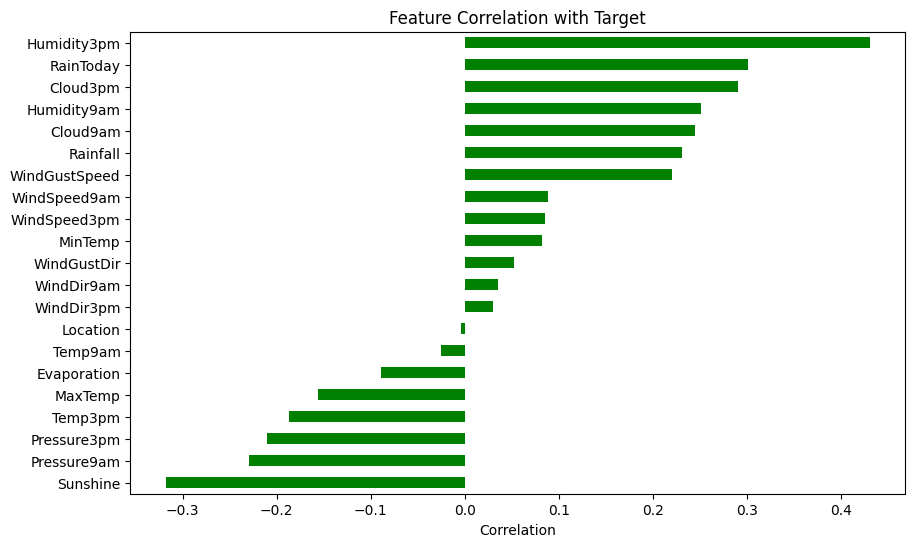

In [25]:
# Hệ số tương quan của từng thuộc tính đối với nhãn
correlations = data.corr()['RainTomorrow'].drop(['RainTomorrow', 'month_sin', 'month_cos'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
correlations.sort_values().plot(kind='barh', color='green')
plt.title('Feature Correlation with Target')
plt.xlabel('Correlation')
plt.show()

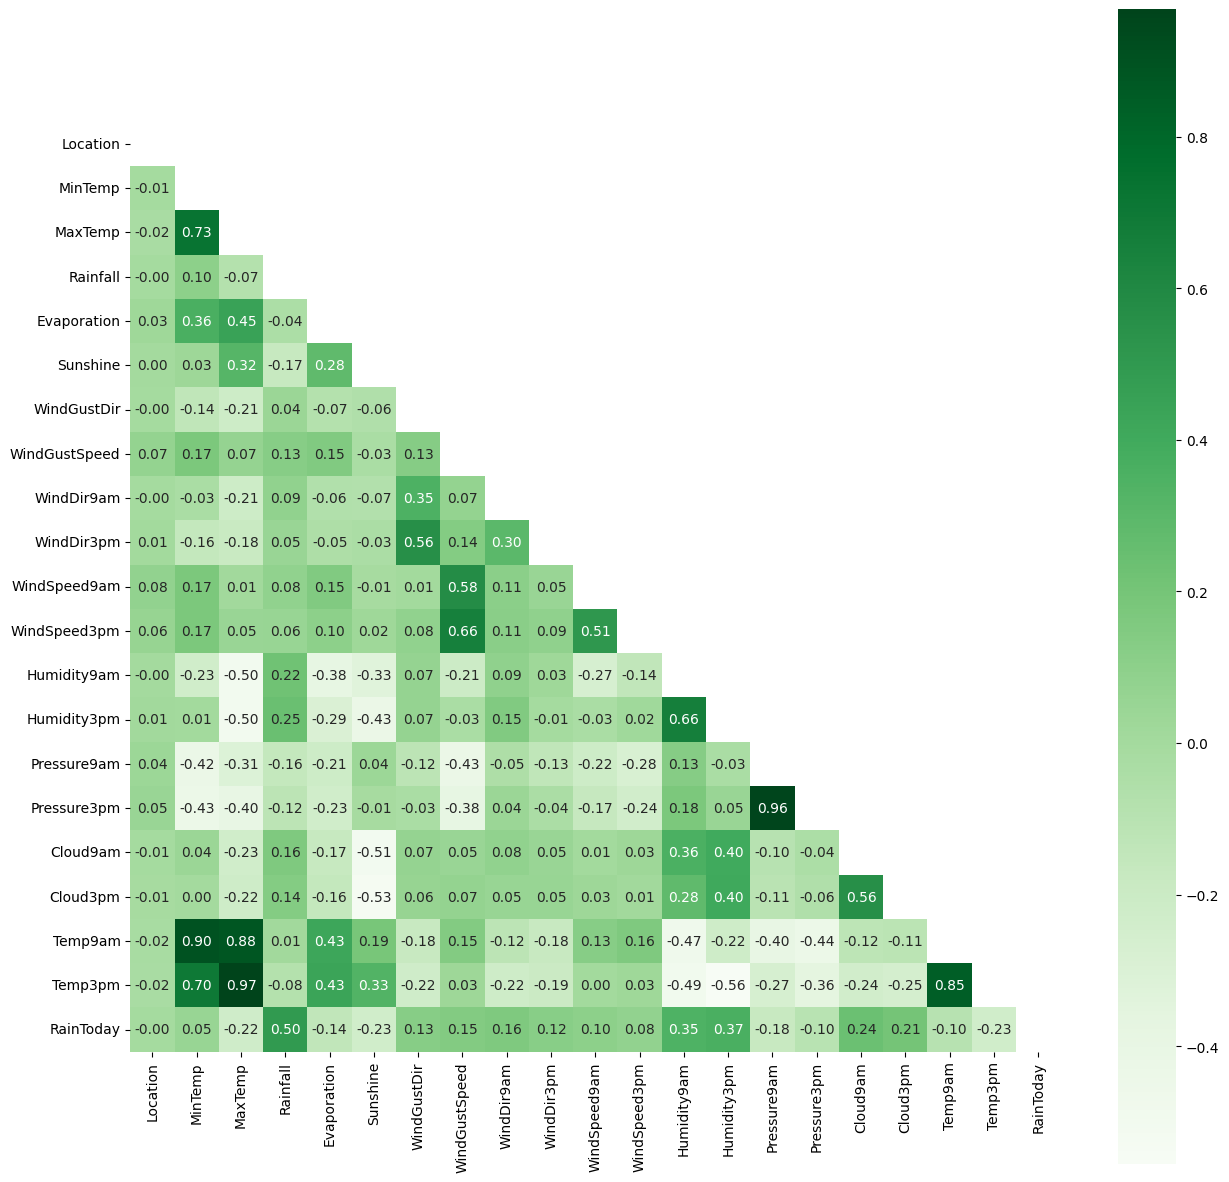

In [26]:
# Ma trận hệ số tương quan của từng cặp thuộc tính với nhau
corr = data.drop(['RainTomorrow', 'month_sin', 'month_cos'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15,15))
ax = sns.heatmap(corr, mask=mask, square=True, annot=True, fmt='.2f', cmap='Greens')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Handle outliers

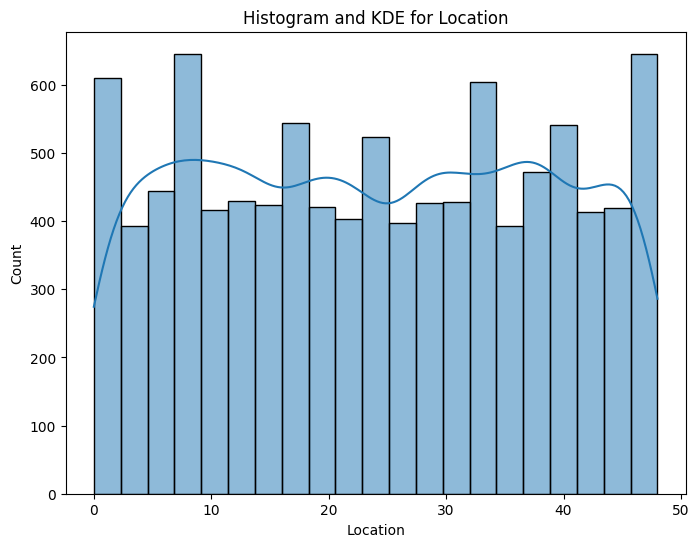

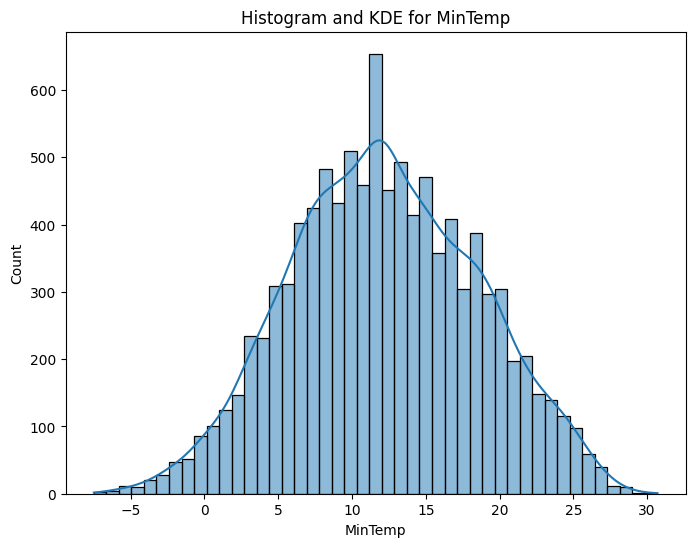

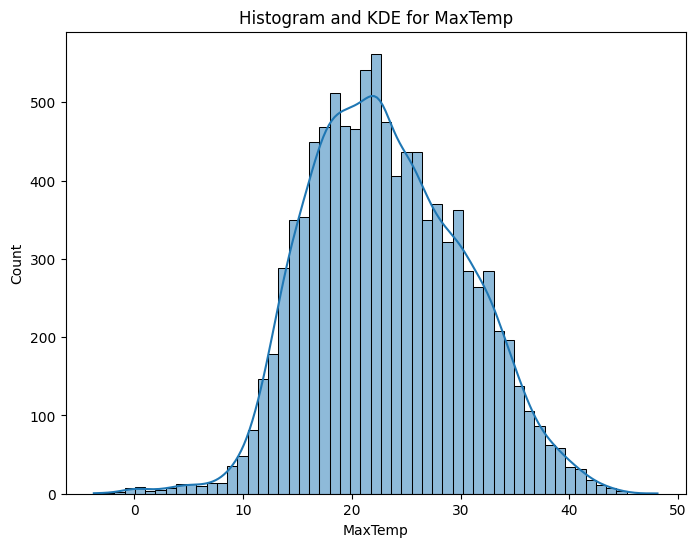

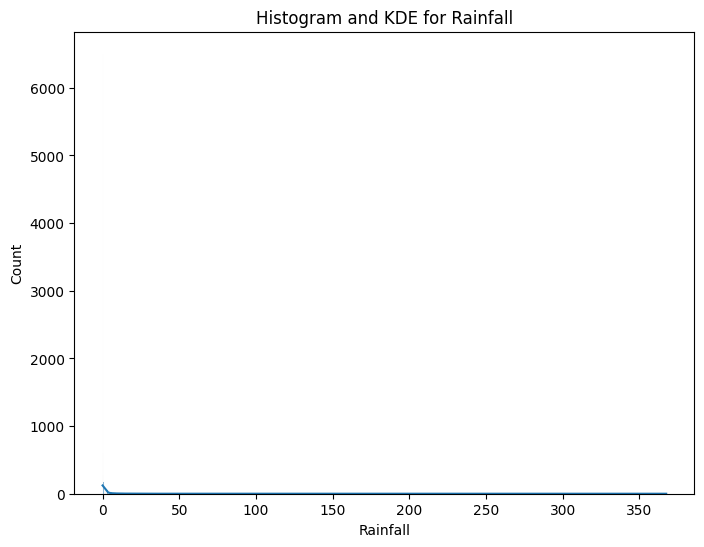

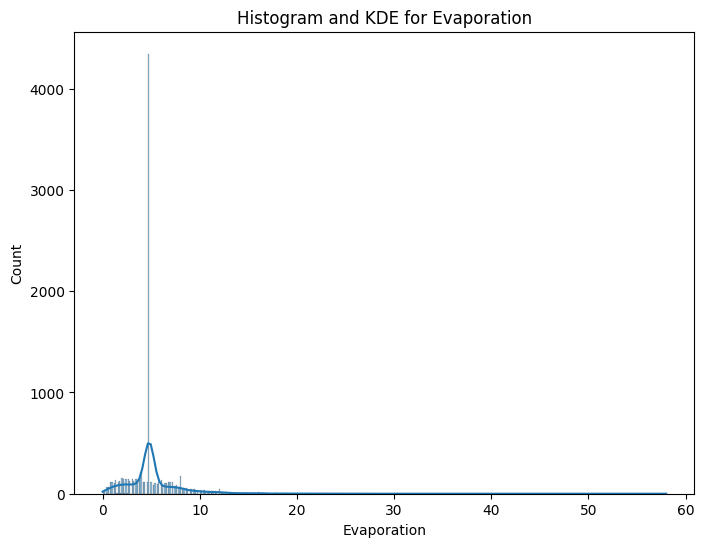

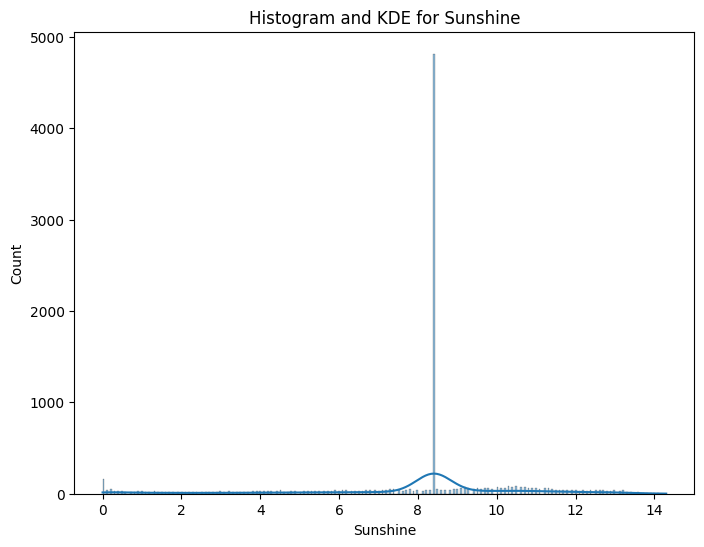

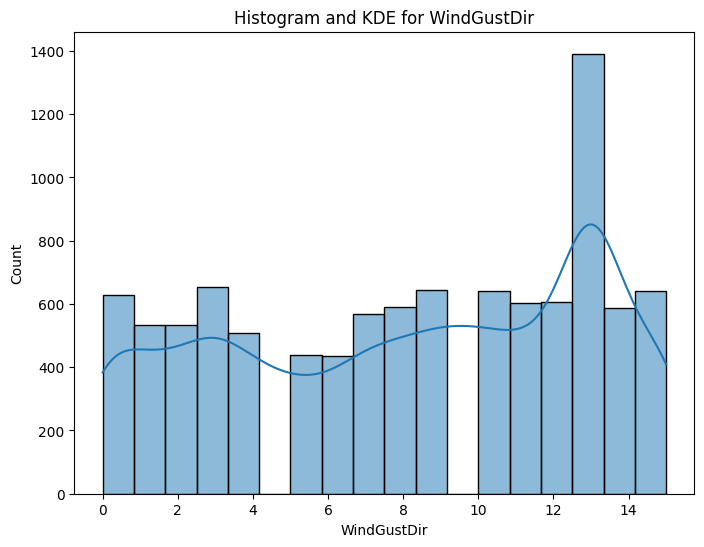

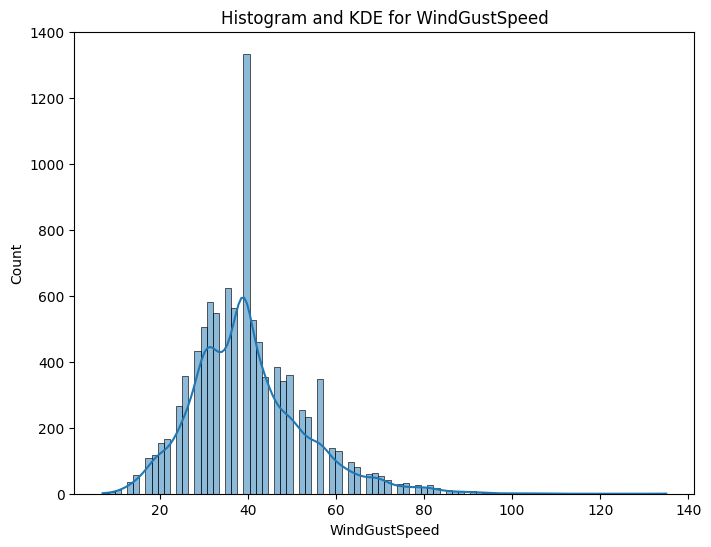

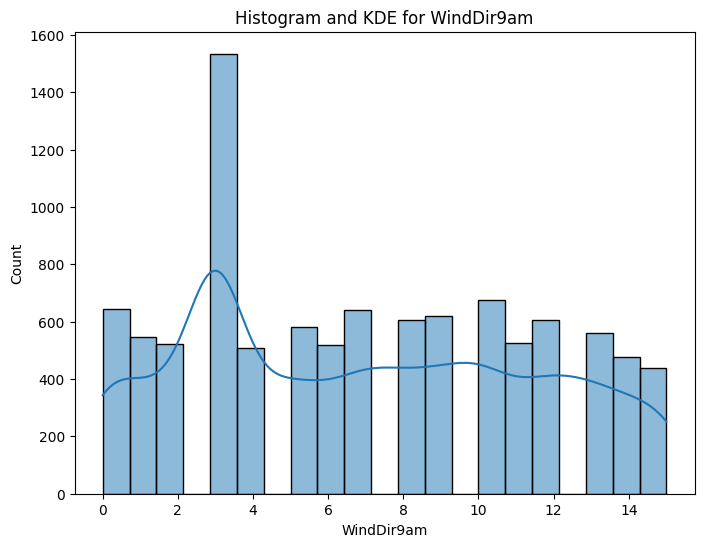

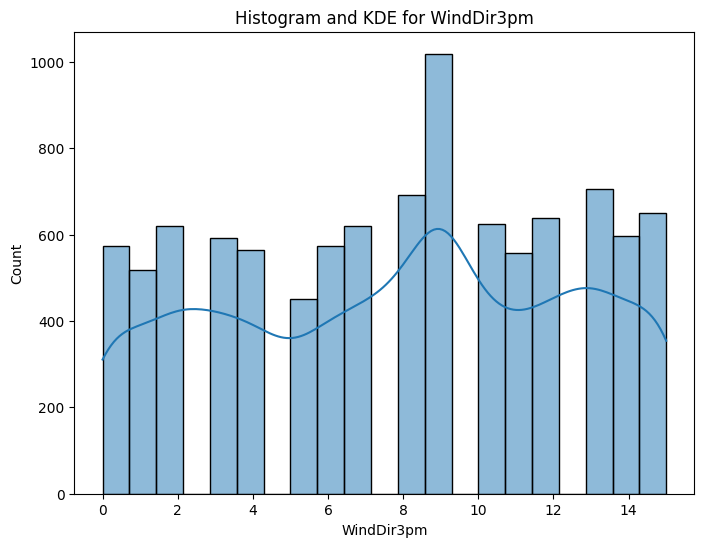

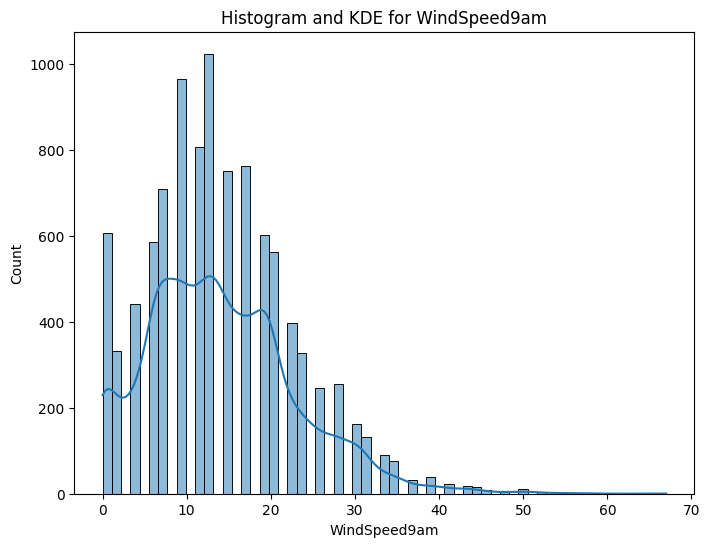

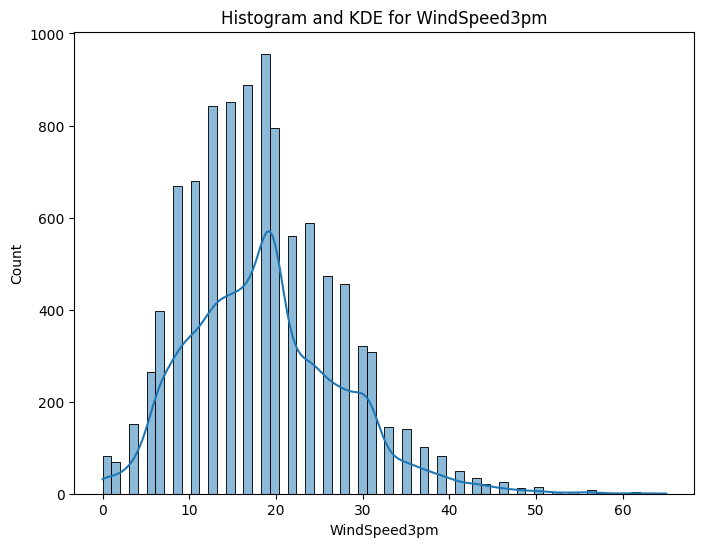

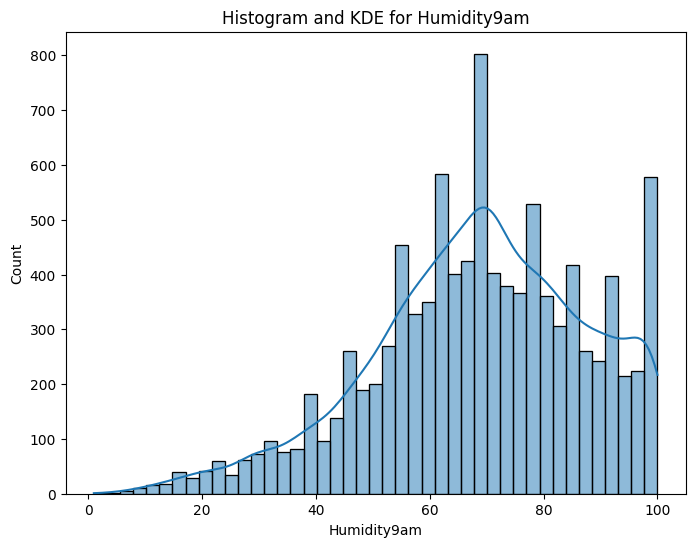

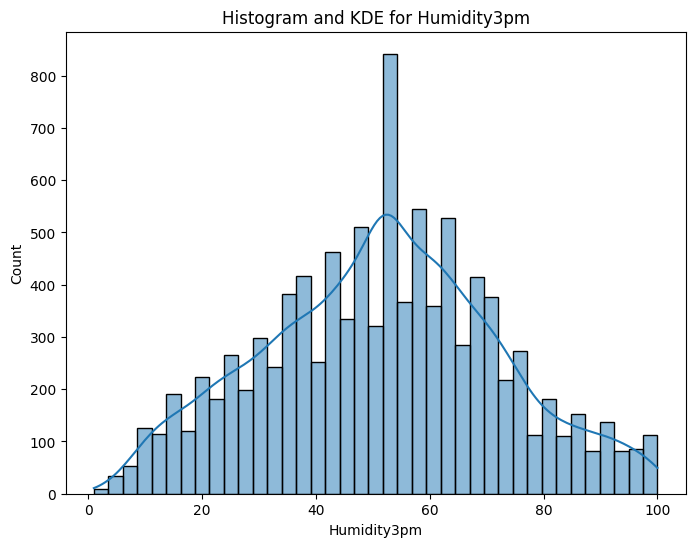

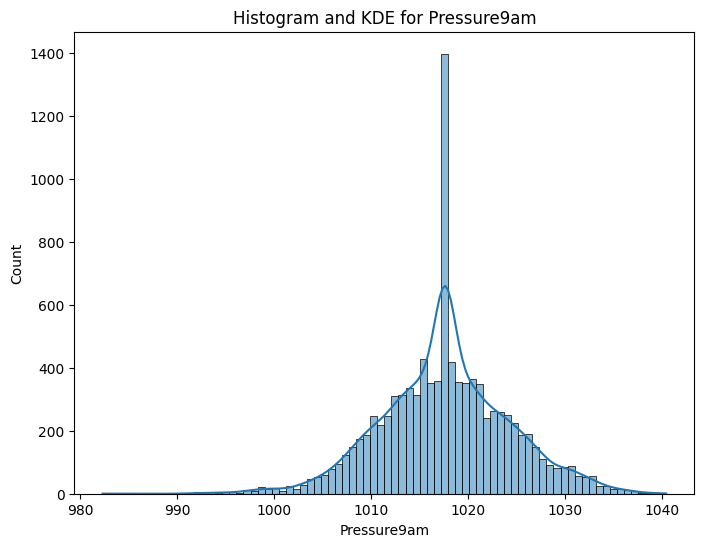

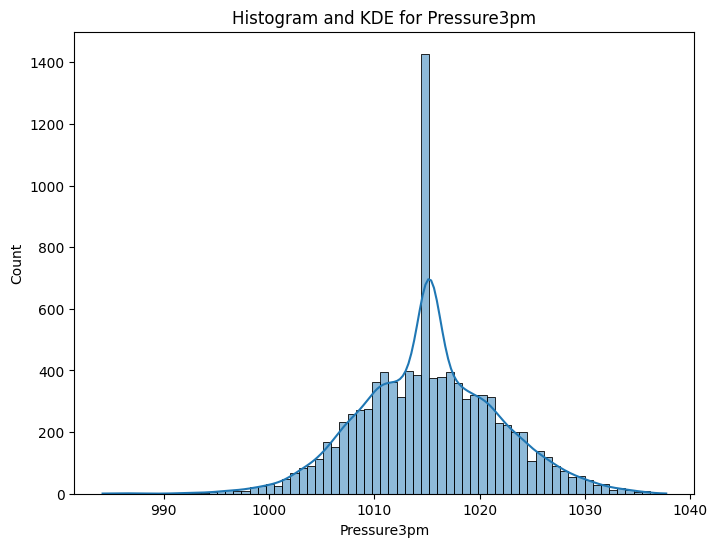

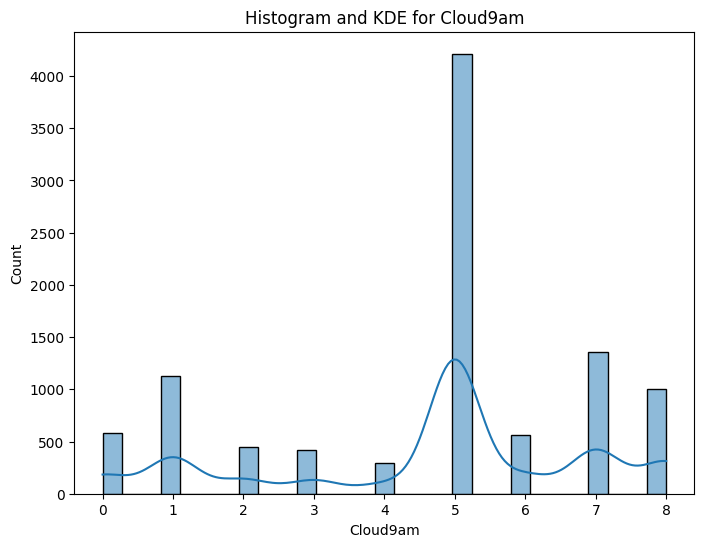

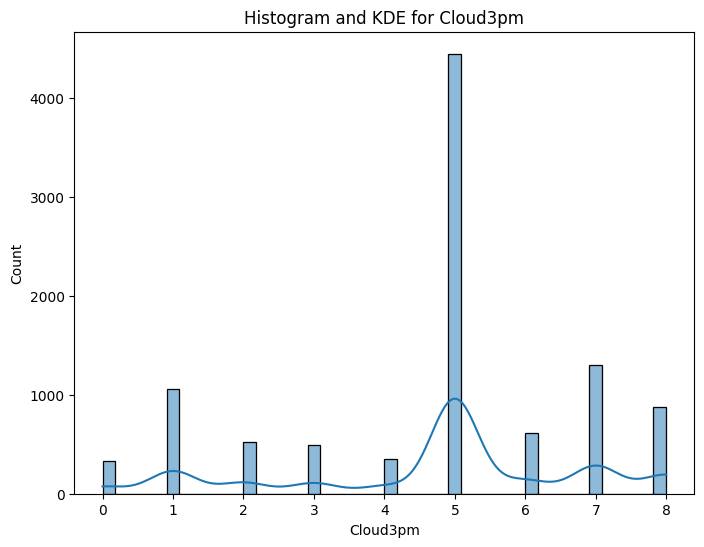

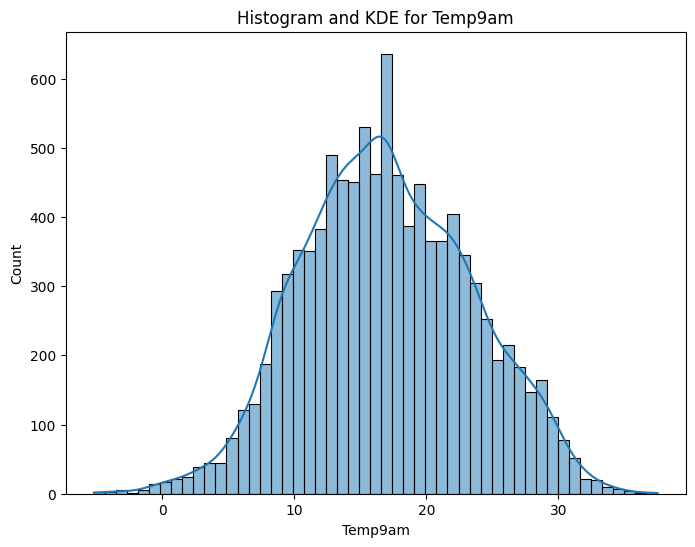

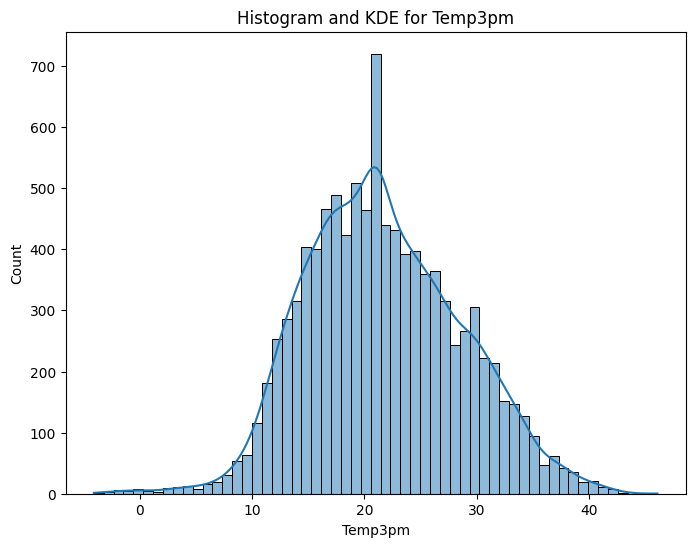

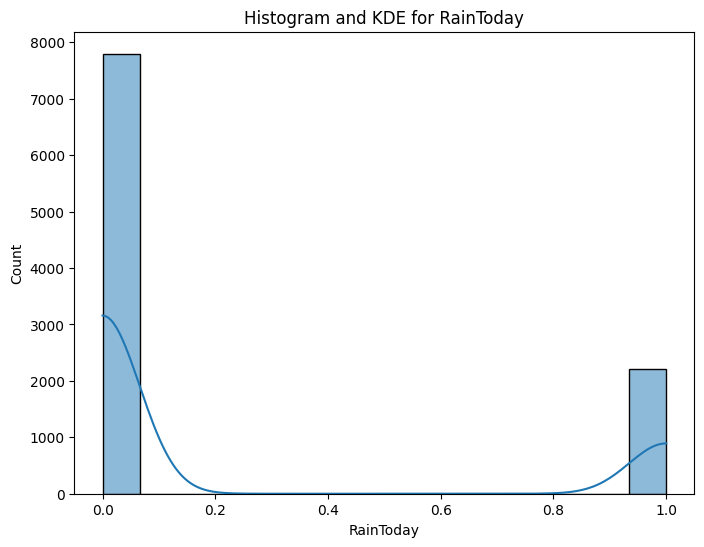

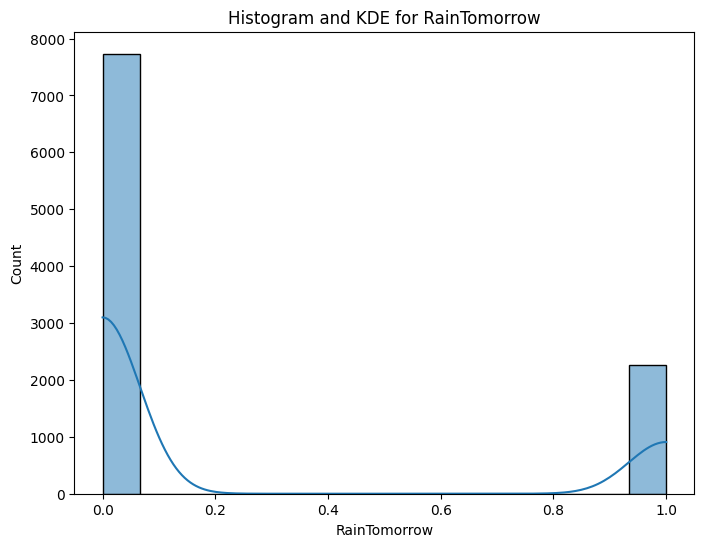

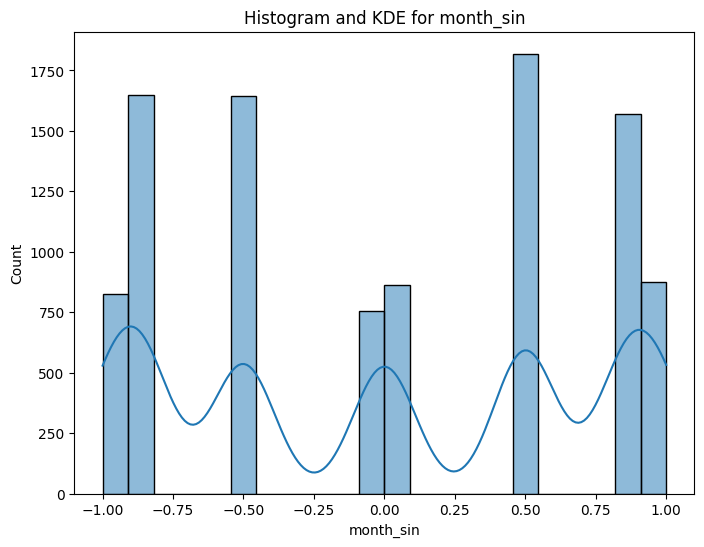

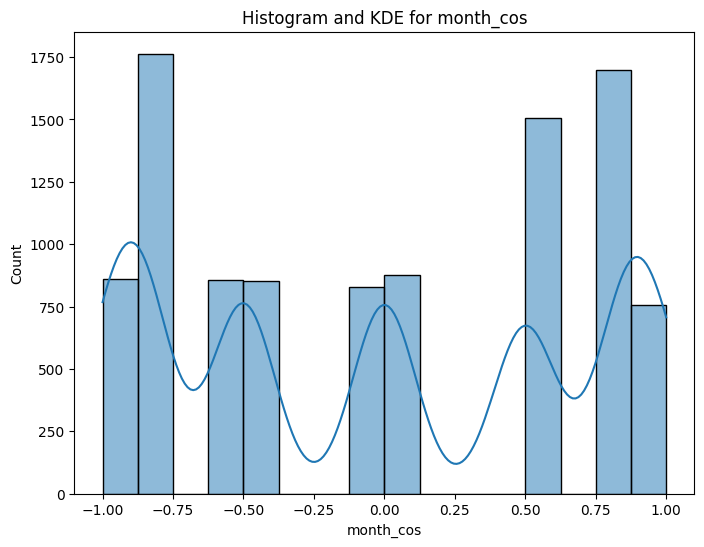

In [27]:
sampled_data = data.sample(n=10000, random_state=42)  # Lấy 10,000 mẫu
for attribute in sampled_data.columns:
    # Kiểm tra nếu cột là dữ liệu số (liên tục)
    if sampled_data[attribute].dtype in ['float64', 'int64']:
        # Vẽ histogram và KDE cho cột này
        plt.figure(figsize=(8, 6))
        sns.histplot(sampled_data[attribute], kde=True)
        plt.title(f"Histogram and KDE for {attribute}")
        plt.show()

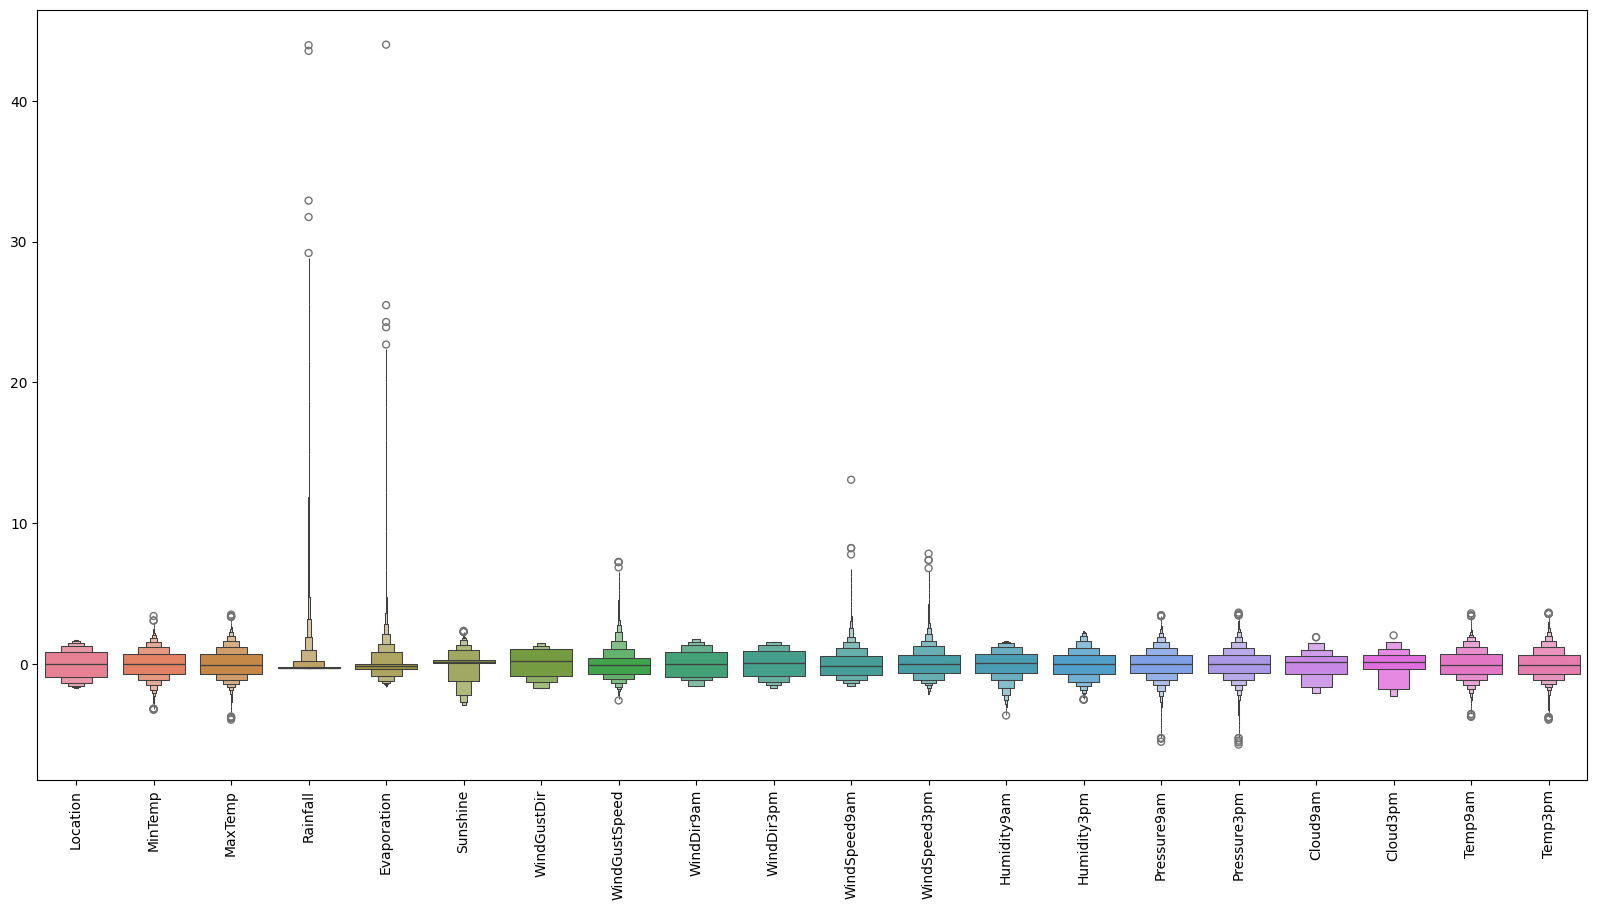

In [ ]:
# Kiểm tra phân phối ban đầu của dữ liệu
# Tách các cột target và cột ngày
features = data.drop(['RainTomorrow','RainToday','month_sin','month_cos'], axis=1)

# Chuẩn hóa dữ liệu và vẽ biểu đồ
col_names = list(features.columns)
s_scaler = StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)


plt.figure(figsize=(20,10))
sns.boxenplot(data = features)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Sử dụng Interquartile Range method để tính khoảng không nhiễu
def outlier_thresholds (df, column, q1=0.25, q3=0.75) :
    quartile1 = df[column].quantile(q1)
    quartile3 = df[column].quantile(q3)
    iq_r = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * iq_r
    low_limit = quartile1 - 1.5 * iq_r
    return low_limit, up_limit

# Kiểm tra 1 điểm có phải điểm nhiễu hay không
def check_outlier(df, column):
    low_limit, up_limit = outlier_thresholds(df, column)
    outliers = (df[column] > up_limit) | (df[column] < low_limit)
    if outliers.any():
        return True
    else:
        return False

# Thay thế các điểm nhiễu bằng các ngưỡng của khoảng không nhiễu
def replace_with_thresholds (df, column) :
    low_limit , up_limit = outlier_thresholds(df, column)
    df.loc[(df[column] < low_limit), column] = low_limit
    df.loc[(df[column] > up_limit), column] = up_limit

In [ ]:
# Kết quả trước khi loại điểm nhiễu
print('Before removing the outliers :')
for column in (data.drop(columns = ['RainTomorrow', 'RainToday', 'month_sin','month_cos', 'Location']).columns):
    print(column, check_outlier(data, column))

Before removing the outliers :
MinTemp True
MaxTemp True
Rainfall True
Evaporation True
Sunshine True
WindGustDir False
WindGustSpeed True
WindDir9am False
WindDir3pm False
WindSpeed9am True
WindSpeed3pm True
Humidity9am True
Humidity3pm False
Pressure9am True
Pressure3pm True
Cloud9am False
Cloud3pm True
Temp9am True
Temp3pm True


In [ ]:
# Kết quả sau khi loại điểm nhiễu
print('After removing the outliers :')
for column in (data.drop(columns = ['RainTomorrow', 'RainToday', 'month_sin','month_cos', 'Location']).columns):
    replace_with_thresholds(data, column)
    print(column, check_outlier(data, column))

After removing the outliers :
MinTemp False
MaxTemp False
Rainfall False
Evaporation False
Sunshine False
WindGustDir False
WindGustSpeed False
WindDir9am False
WindDir3pm False
WindSpeed9am False
WindSpeed3pm False
Humidity9am False
Humidity3pm False
Pressure9am False
Pressure3pm False
Cloud9am False
Cloud3pm False
Temp9am False
Temp3pm False


<ipython-input-24-a5370f658825>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-9.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[column] < low_limit), column] = low_limit


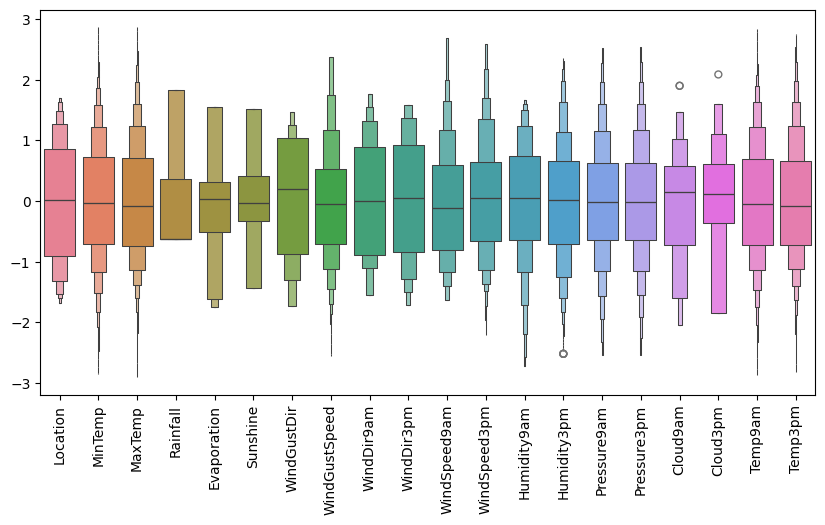

In [ ]:
# Biểu diễn lại bằng đồ thị
features = data.drop(['RainTomorrow','RainToday','month_sin','month_cos'], axis=1) # dropping target and extra columns

# Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

#Detecting outliers

plt.figure(figsize=(10,5))
sns.boxenplot(data = features)
plt.xticks(rotation=90)
plt.show()

### Train-Test Splitting

In [ ]:
X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']

# Lấy 80% tập dữ liệu để training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Original Class Distribution:", y_train.value_counts())
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Original Class Distribution: RainTomorrow
0.0    90306
1.0    26062
Name: count, dtype: int64
Train set size: (116368, 23)
Test set size: (29092, 23)


### Rebalance the data

In [ ]:
#Kết hợp 2 phương pháp SMOTE và Undersampling, áp dụng cho train set

# Thiết lập pipeline kết hợp SMOTE và Undersampling
over = SMOTE(sampling_strategy=0.5)  # Tăng lớp thiểu số lên 50% của lớp đa số
under = RandomUnderSampler(sampling_strategy=0.8)  # Giảm lớp đa số xuống 80%

# Tạo pipeline kết hợp SMOTE và Undersampling
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Áp dụng pipeline lên dữ liệu
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)
print("Class Distribution after using pipeline:", y_train_resampled.value_counts())

print('X_train size', X_train_resampled.shape)
print('y_train size', y_train_resampled.shape)
print('X_test size', X_test.shape)
print('y_test size', y_test.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class Distribution after using pipeline: RainTomorrow
0.0    56441
1.0    45153
Name: count, dtype: int64
X_train size (101594, 23)
y_train size (101594,)
X_test size (29092, 23)
y_test size (29092,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


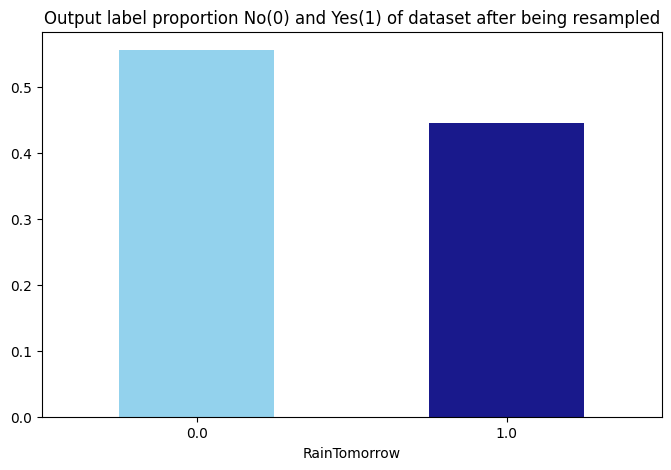

In [ ]:
# Kiểm tra tỉ lệ nhãn đầu ra của tập dữ liệu
fig = plt.figure(figsize = (8,5))
y_train_resampled.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Output label proportion No(0) and Yes(1) of dataset after being resampled')
plt.show()

### Standardization

In [ ]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,month_sin,month_cos
94185,39,9.3,23.7,0.0,4.8,9.45,1.0,39.0,8,1,...,44.0,1021.2,1018.9,1.0,2.0,17.9,22.7,0.0,1.224647e-16,-1.000000e+00
112630,46,7.7,21.4,0.0,4.8,8.40,7.0,48.0,7,7,...,59.0,1012.7,1010.6,5.0,5.0,18.4,20.4,0.0,-5.000000e-01,8.660254e-01
24465,30,18.5,39.4,0.0,4.8,8.40,7.0,59.0,6,14,...,16.0,1017.6,1015.2,5.0,5.0,23.3,38.1,0.0,-5.000000e-01,8.660254e-01
22409,27,15.5,18.4,0.0,4.8,7.45,15.0,50.0,13,15,...,75.0,1014.8,1015.4,3.0,7.0,17.3,16.4,0.0,-8.660254e-01,-5.000000e-01
109569,1,8.3,20.4,0.0,3.6,9.40,13.0,39.0,15,13,...,67.0,1013.2,1009.8,1.0,4.0,14.0,18.5,0.0,-1.000000e+00,-1.836970e-16


In [ ]:
#Chuẩn hóa dữ liệu sử dụng StandardScaler (z-score), không chuẩn hóa 2 cột month_sin và month_cos

columns_to_exclude = ['month_sin', 'month_cos']
# data_no_month=data.drop(columns=columns_to_exclude)
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data_no_month)
# data_scaled = pd.DataFrame(data_scaled, columns=data_no_month.columns)
# data_scaled[columns_to_exclude] = data[columns_to_exclude].reset_index(drop=True)
X_train_no_month = X_train.drop(columns=columns_to_exclude)
X_test_no_month = X_test.drop(columns=columns_to_exclude)
X_train_resampled_no_month = X_train_resampled.drop(columns=columns_to_exclude)

# Chuẩn hóa tập train và test mà không có cột month_sin và month_cos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_no_month)
X_test_scaled = scaler.transform(X_test_no_month)
scaler_resampled = StandardScaler()
X_train_resampled_scaled = scaler_resampled.fit_transform(X_train_resampled_no_month)
X_test_resampled_scaled = scaler_resampled.transform(X_test_no_month)

# Đưa cột month_sin và month_cos quay lại sau khi chuẩn hóa
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_no_month.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_no_month.columns)
X_train_resampled_scaled = pd.DataFrame(X_train_resampled_scaled, columns=X_train_resampled_no_month.columns)
X_test_resampled_scaled = pd.DataFrame(X_test_resampled_scaled, columns=X_test_no_month.columns)

X_train_scaled[columns_to_exclude] = X_train[columns_to_exclude].reset_index(drop=True)
X_test_scaled[columns_to_exclude] = X_test[columns_to_exclude].reset_index(drop=True)
X_train_resampled_scaled[columns_to_exclude] = X_train_resampled[columns_to_exclude].reset_index(drop=True)
X_test_resampled_scaled[columns_to_exclude] = X_test[columns_to_exclude].reset_index(drop=True)


In [ ]:
# Đặt lại tên các tập dữ liệu cho thuận tiện
X_train=X_train_scaled
X_test=X_test_scaled
X_train_resampled=X_train_resampled_scaled
X_test_resampled=X_test_resampled_scaled

In [ ]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,month_sin,month_cos
0,1.067965,-0.455112,0.067269,-0.626561,0.033317,1.517114,-1.511997,-0.053827,0.221841,-1.498443,...,-0.369041,0.536089,0.554832,-1.603661,-1.346767,0.140638,0.150586,-0.535631,1.224647e-16,-1.000000e+00
1,1.559973,-0.706545,-0.258476,-0.626561,0.033317,-0.035101,-0.233283,0.684994,0.000485,-0.176076,...,0.364688,-0.759125,-0.716720,0.150840,0.126134,0.218243,-0.187252,-0.535631,-5.000000e-01,8.660254e-01
2,0.435384,0.990630,2.290833,-0.626561,0.033317,-0.035101,-0.233283,1.587997,-0.220871,1.366685,...,-1.738668,-0.012473,-0.012004,0.150840,0.126134,0.978771,2.412637,-0.535631,-5.000000e-01,8.660254e-01
3,0.224524,0.519193,-0.683361,-0.626561,0.033317,-1.439487,1.471669,0.849176,1.328623,1.587080,...,1.147332,-0.439131,0.018636,-0.726411,1.108068,0.047512,-0.774798,-0.535631,-8.660254e-01,-5.000000e-01
4,-1.602934,-0.612257,-0.400104,-0.626561,-0.792558,1.443199,1.045431,-0.053827,1.771336,1.146291,...,0.756010,-0.682936,-0.839279,-1.603661,-0.364833,-0.464681,-0.466337,-0.535631,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116363,0.505671,-0.486541,-0.754175,1.841623,-1.480787,-1.439487,0.832312,-0.956831,-1.106297,0.925896,...,0.071196,0.459899,0.493553,0.589465,-1.346767,-0.588849,-0.657289,1.866956,1.224647e-16,-1.000000e+00
116364,-0.618918,-0.235107,-0.017708,-0.626561,-0.379621,-1.439487,-0.233283,1.013359,-0.220871,-0.396471,...,-0.760363,-0.881028,-1.130357,1.028090,0.617101,-0.681974,-0.010989,-0.535631,-8.660254e-01,5.000000e-01
116365,0.083950,-0.015103,1.880111,-0.626561,0.033317,-0.035101,-0.233283,0.684994,-0.663584,-0.176076,...,-2.129990,0.078954,-0.165203,0.150840,0.126134,0.621788,1.839780,-0.535631,-2.449294e-16,1.000000e+00
116366,-0.759492,1.823503,1.412737,-0.626561,0.721546,1.517114,-0.872640,0.274538,0.664554,-0.616865,...,-0.515787,-0.119137,-0.456281,0.150840,-1.837734,1.428880,1.531319,-0.535631,-8.660254e-01,-5.000000e-01


### Extract to .pkl

In [ ]:
#Export 6 file bao gồm X_train.pkl, X_train_resampled.pkl, X_test.pkl, X_test_resampled.pkl, Y_train.pkl, Y_train_resampled.pkl, Y_test.pkl
import pickle
# from google.colab import drive
# drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Result/Preprocessed_Data/X_train.pkl'
with open(file_path, 'wb') as f:
    pickle.dump({},f)
with open(file_path, 'wb') as f:
    pickle.dump(X_train,f)
file_path = '/content/drive/MyDrive/Result/Preprocessed_Data/X_train_resampled.pkl'
with open(file_path, 'wb') as f:
    pickle.dump({},f)
with open(file_path, 'wb') as f:
    pickle.dump(X_train_resampled,f)
file_path = '/content/drive/MyDrive/Result/Preprocessed_Data/X_test.pkl'
with open(file_path, 'wb') as f:
    pickle.dump({},f)
with open(file_path, 'wb') as f:
    pickle.dump(X_test,f)
file_path = '/content/drive/MyDrive/Result/Preprocessed_Data/X_test_resampled.pkl'
with open(file_path, 'wb') as f:
    pickle.dump({},f)
with open(file_path, 'wb') as f:
    pickle.dump(X_test_resampled,f)
file_path = '/content/drive/MyDrive/Result/Preprocessed_Data/Y_train.pkl'
with open(file_path, 'wb') as f:
    pickle.dump({},f)
with open(file_path, 'wb') as f:
    pickle.dump(y_train,f)
file_path = '/content/drive/MyDrive/Result/Preprocessed_Data/Y_train_resampled.pkl'
with open(file_path, 'wb') as f:
    pickle.dump({},f)
with open(file_path, 'wb') as f:
    pickle.dump(y_train_resampled,f)
file_path = '/content/drive/MyDrive/Result/Preprocessed_Data/Y_test.pkl'
with open(file_path, 'wb') as f:
    pickle.dump({},f)
with open(file_path, 'wb') as f:
    pickle.dump(y_test,f)

Mounted at /content/drive


In [ ]:
# # Export result to .pkl file
# import pickle
# from google.colab import drive
# drive.mount('/content/drive')
# file_path = '/content/drive/MyDrive/Result/Model_Evaluation/2.1. Logistic_Regresstion.pkl'
# with open(file_path, 'wb') as f:
#     pickle.dump(result_acc,f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
